<center><h1> ADMN5005 Financial Analytics </h1>
<h2> Assignment 3: Credit Card Fraud Detection

<center><b> Group Members: </b> Eyas Abu Elhouf, Katrina Ong, Melvin Cheriyan, Pranav Gujar, Bista Bijo, Praveen Kumar <br><br>
<b>Code Written by: </b> Eyas Abu Elhouf, Katrina Ong


---

## 1) Import Packages

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import data preprocessing libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn import metrics
from sklearn.model_selection import KFold, StratifiedKFold

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.metrics import classification_report_imbalanced

---

## 2) Import & Explore Dataset

In [2]:
# Import the dataset and check the first 5 rows
df = pd.read_csv('creditcard (1).csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Data stats
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# The number of samples in the dataframe
len(df)

284807

In [6]:
# Check the number of null values 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Check the dependant variable values, the dataset is highly imbalanced
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

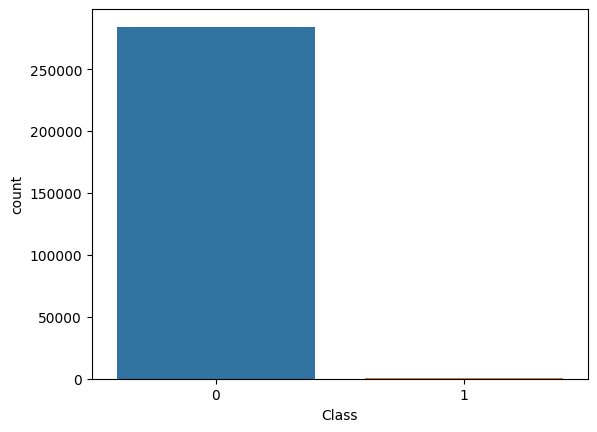

In [8]:
sns.countplot(data = df, x = "Class");

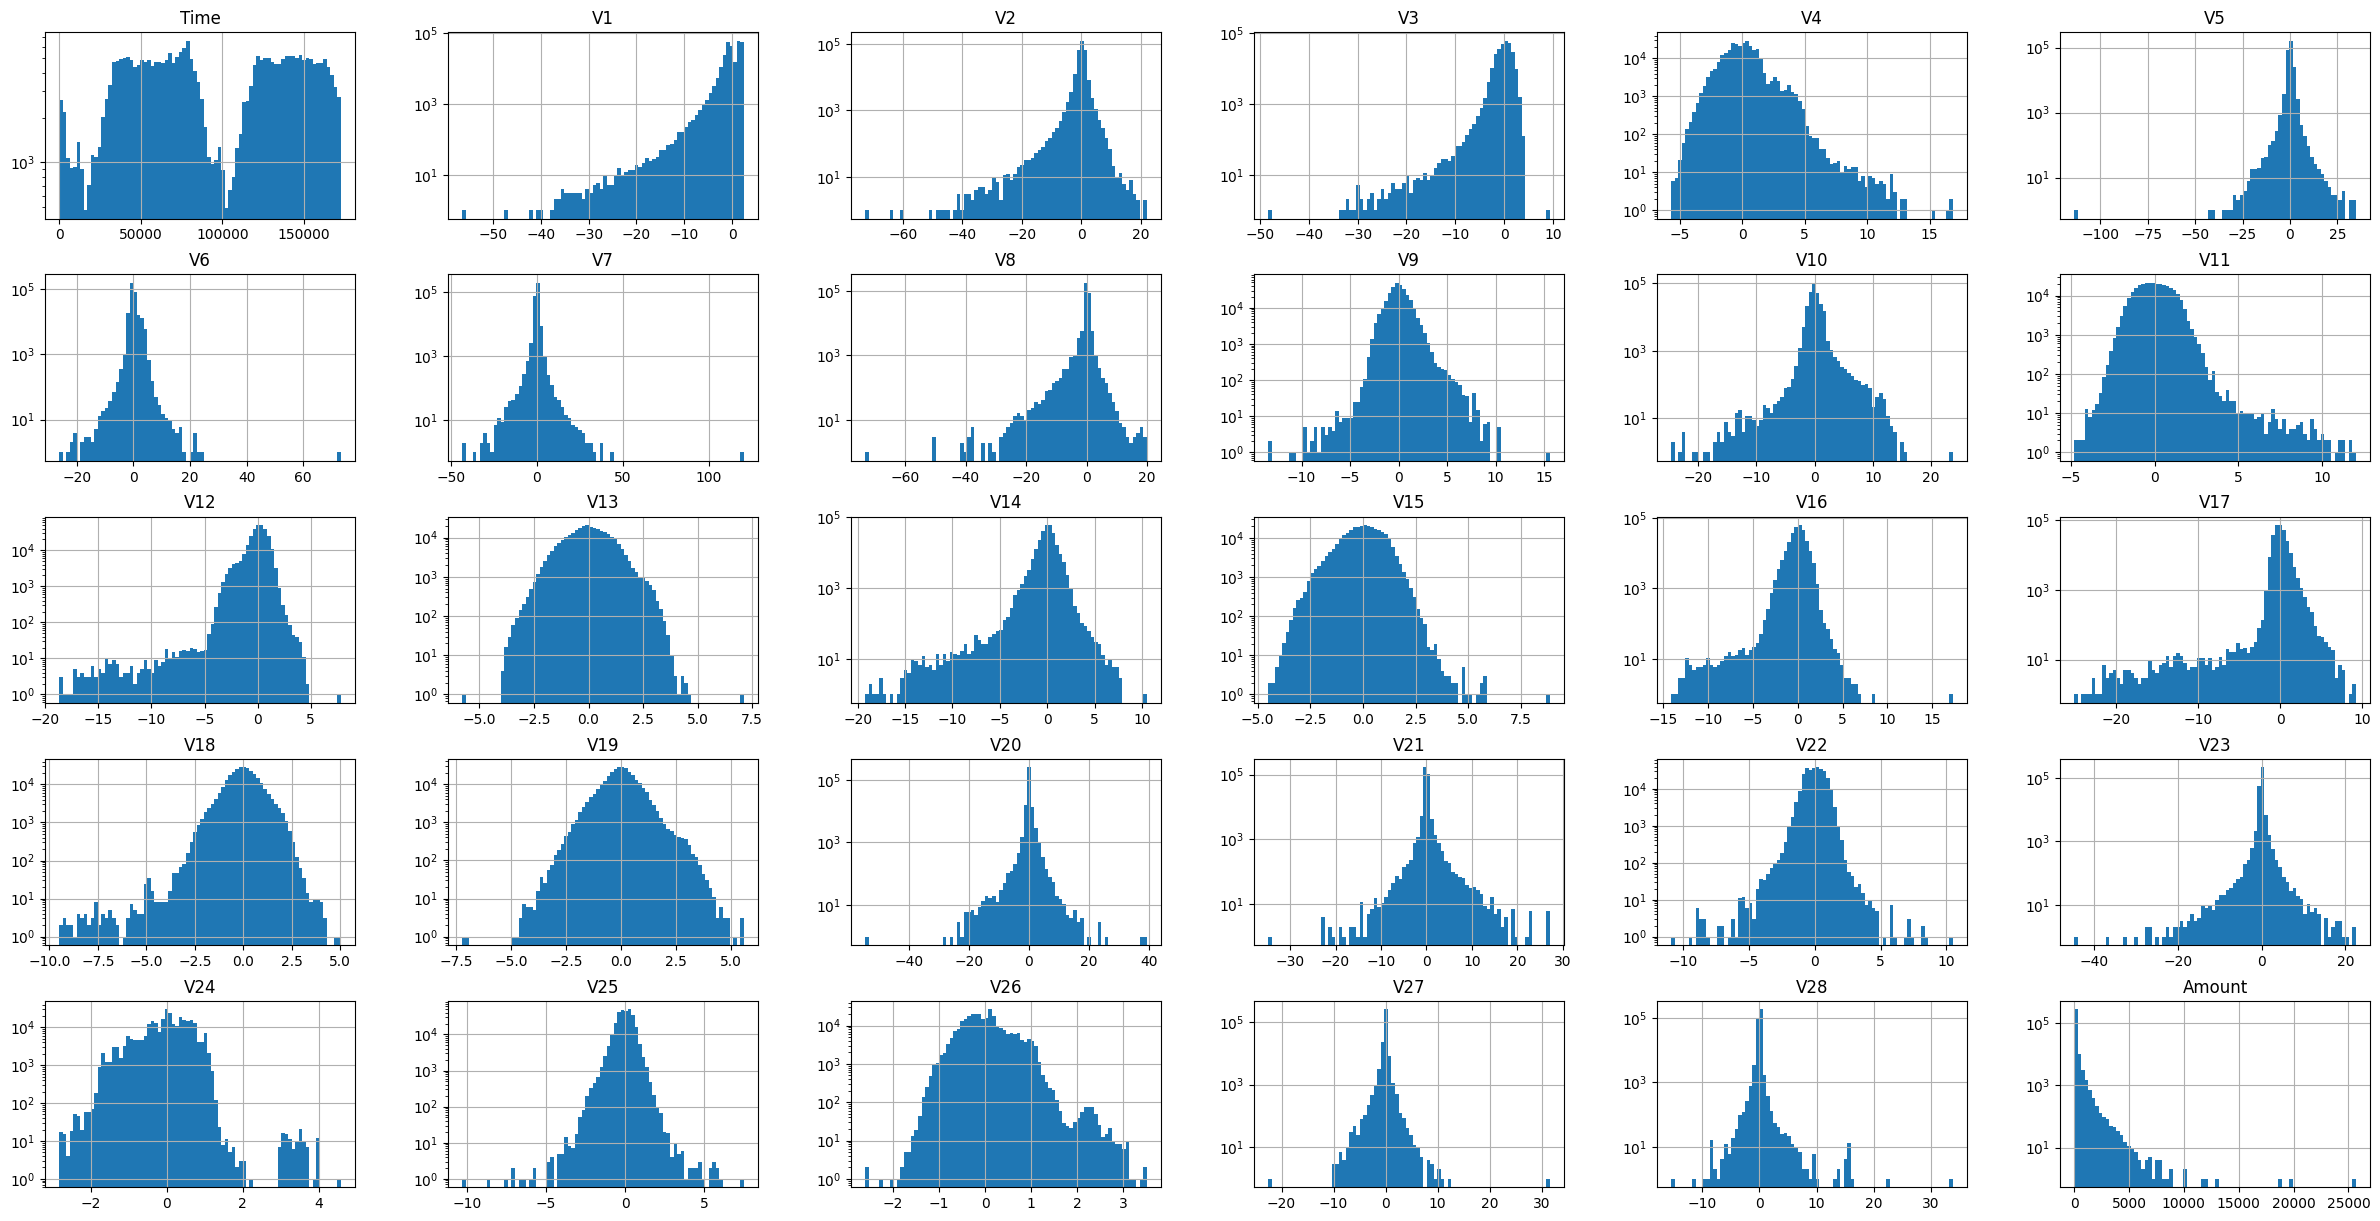

In [9]:
# Check the distribution of the independant variables
df_independent = df.drop(["Class"], axis=1)
df.hist(column = df_independent.columns, bins = 80, figsize = (30,15), layout = (5,6), log = True);

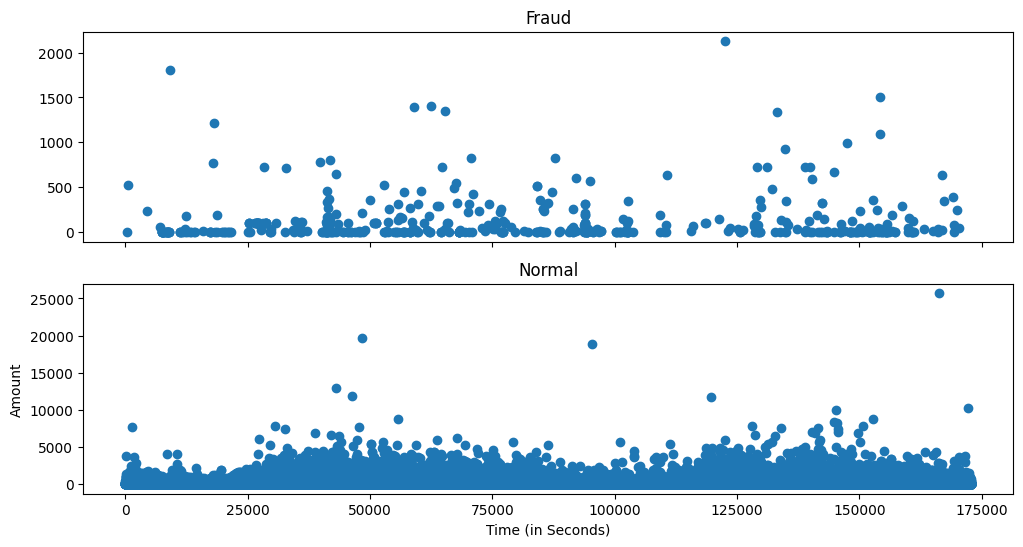

In [10]:
# Compare the time for Fraud and Normal transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

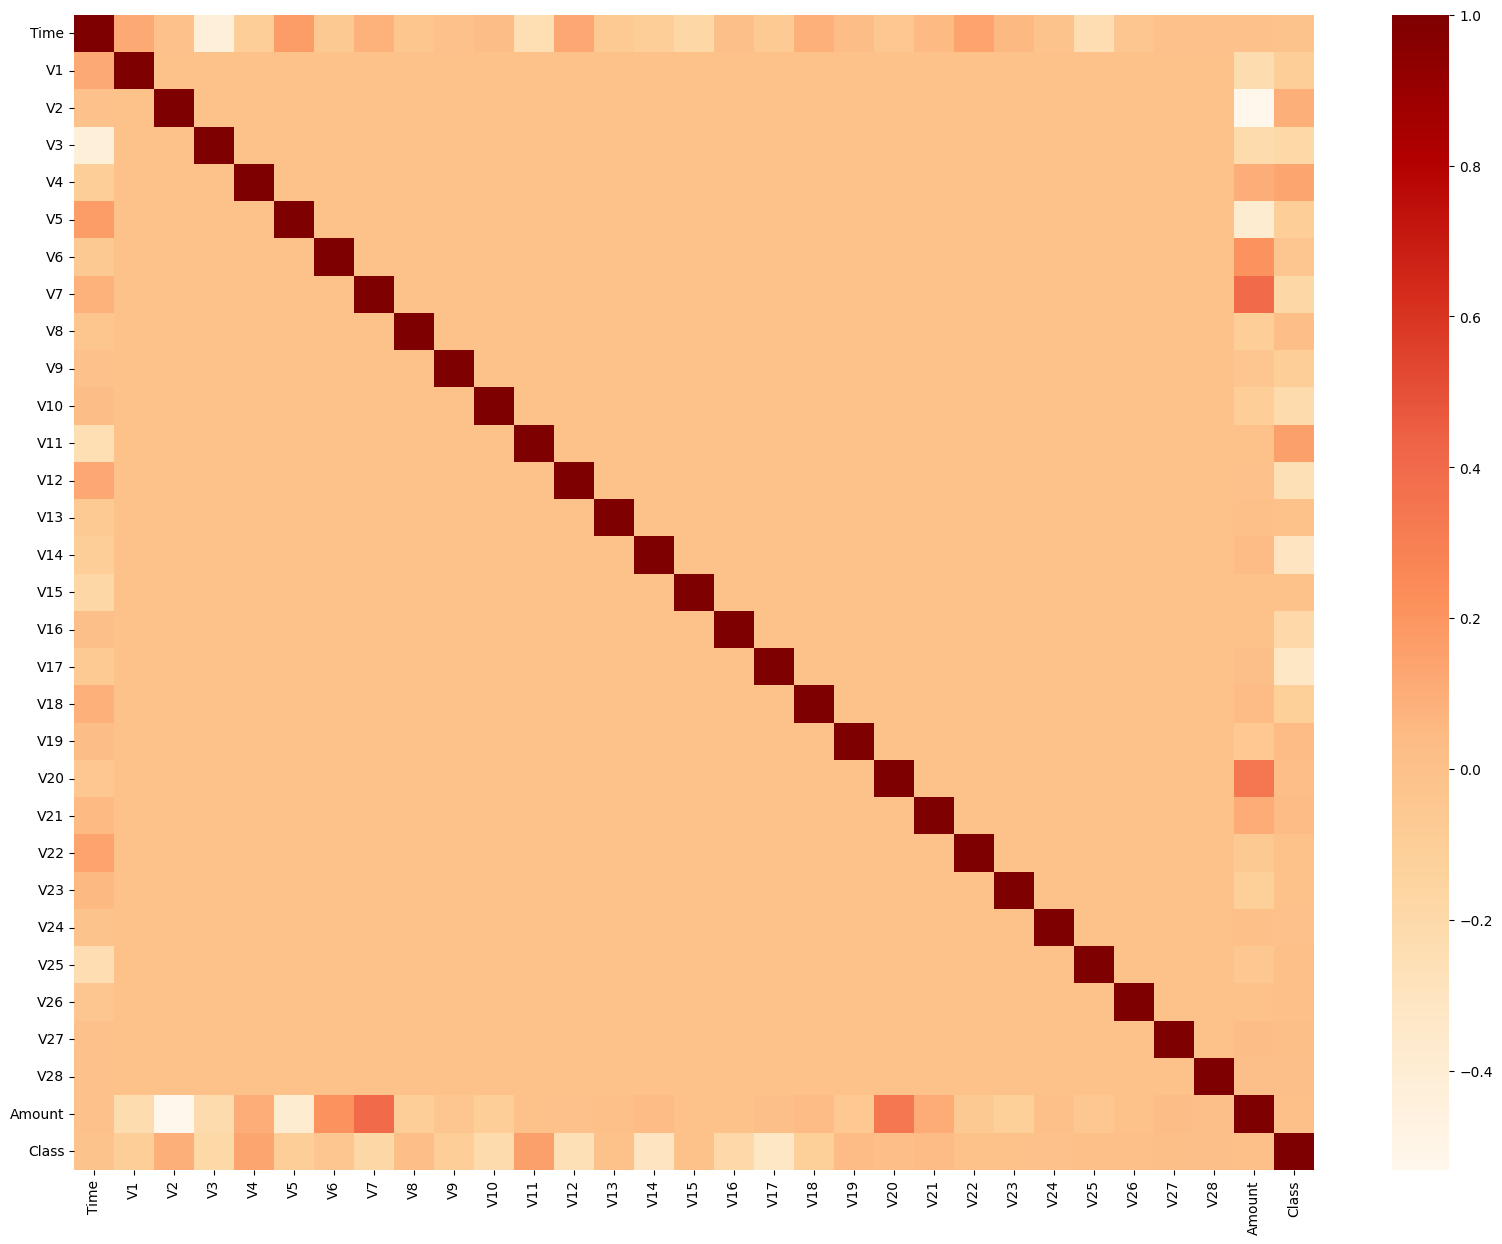

In [11]:
#Create Correlation Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot = False, annot_kws={"fontsize":18}, cmap='OrRd');

In [12]:
#Check for duplicates in samples
df.duplicated().value_counts()

False    283726
True       1081
dtype: int64

In [13]:
#Drop Duplicates
df.drop_duplicates(inplace=True)

In [14]:
df["Class"].value_counts() #no significant reduction in fraud cases

0    283253
1       473
Name: Class, dtype: int64

---

## 3) Data Preprocessing

In [15]:
#Separate the Features and the Target Variable
X = df.drop('Class',axis=1)
y = df['Class']

In [16]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Check the coluns of the training set
X_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [19]:
scaler = RobustScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [20]:
# Check the shapes and confirm the dependant variables are equal to the target variable
X_train_sc.shape, y_train.shape, X_test_sc.shape, y_test.shape

((212794, 30), (212794,), (70932, 30), (70932,))

---

## 4) Model Development

### 4.1) First Approach: Using Class weights: penalty for misclassifying Frauds

#### Logistic Regression

In [21]:
#Instantiate the Model
log_model = LogisticRegression(max_iter =200, class_weight={0: 1, 1: 10}, random_state=21)

In [22]:
#Train the Model
log_model.fit(X_train_sc, y_train)

LogisticRegression(class_weight={0: 1, 1: 10}, max_iter=200, random_state=21)

In [23]:
#Predict on Test Set
y_pred = log_model.predict(X_test_sc)

In [24]:
#Get Predicted Probabilities
y_prob = log_model.predict_proba(X_test_sc)

In [25]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(70932, 2)

In [26]:
#Create a DataFrame
y_prob_df_logreg1 = pd.DataFrame(y_prob, index=y_test.index)

y_prob_df_logreg1.head(3)

,0,1
104697,0.998842,0.001158
134356,0.999998,0.000002
42637,0.999841,0.000159


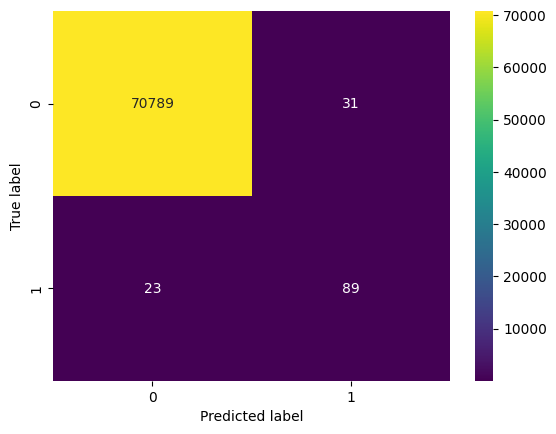

In [27]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='viridis', annot = True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [28]:
#Defining a function to get Key metrics

def get_metrics(target,predicted,predicted_prob):
    #accuracy = round(metrics.accuracy_score(target,predicted)*100,2)
    #error = round(100 - accuracy,2)
    
    report = metrics.classification_report(target, predicted, output_dict=True )
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1 = report['macro avg']['f1-score']
    auc = metrics.roc_auc_score(target,predicted_prob)
    classification_report = metrics.classification_report(target,predicted, digits = 4)
    
    
    #print(f'''Accuracy: {accuracy}% 
#Error: {error}%
#''')
    
    print("Classification Report")
    
    print(classification_report)
    
    print(f'AUC: {round(auc,2)}')
    
    return precision, recall, f1, auc

In [29]:
#Get Key Logistic Regression Metrics
logreg1_metrics = get_metrics(y_test,y_pred,y_prob_df_logreg1[1])

Classification Report
              precision    recall  f1-score   support

           0     0.9997    0.9996    0.9996     70820
           1     0.7417    0.7946    0.7672       112

    accuracy                         0.9992     70932
   macro avg     0.8707    0.8971    0.8834     70932
weighted avg     0.9993    0.9992    0.9993     70932

AUC: 0.98


#### Support Vector Classifier

In [30]:
#Instantiate the Model
svc_model = SVC(class_weight= {0: 1, 1: 10}, probability = True, random_state=21)

In [31]:
#Train the Model
svc_model.fit(X_train_sc, y_train)

SVC(class_weight={0: 1, 1: 10}, probability=True, random_state=21)

In [32]:
#Predict on Test Set
y_pred = svc_model.predict(X_test_sc)

In [33]:
#Get Predicted Probabilities
y_prob = svc_model.predict_proba(X_test_sc)

In [34]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(70932, 2)

In [35]:
#Create a DataFrame
y_prob_df_svc1 = pd.DataFrame(y_prob, index=y_test.index)

y_prob_df_svc1.head(3)

,0,1
104697,0.999882,0.000118
134356,0.999484,0.000516
42637,0.999883,0.000117


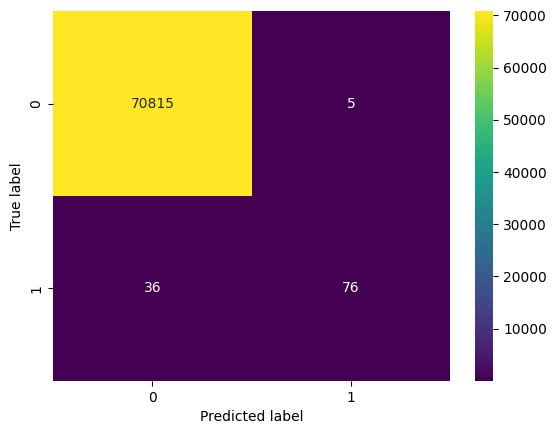

In [36]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='viridis', annot = True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [37]:
#Get Key SVC Metrics
svc1_metrics = get_metrics(y_test,y_pred,y_prob_df_svc1[1])

Classification Report
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     70820
           1     0.9383    0.6786    0.7876       112

    accuracy                         0.9994     70932
   macro avg     0.9689    0.8393    0.8936     70932
weighted avg     0.9994    0.9994    0.9994     70932

AUC: 0.94


#### Random Forest Classifier

In [38]:
#Instantiate the Model
rf_model = RandomForestClassifier(class_weight= {0: 1, 1: 10}, random_state=21)

In [39]:
#Train the Model
rf_model.fit(X_train_sc, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=21)

In [40]:
#Predict on Test Set
y_pred = rf_model.predict(X_test_sc)

In [41]:
#Get Predicted Probabilities
y_prob = rf_model.predict_proba(X_test_sc)

In [42]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(70932, 2)

In [43]:
#Create a DataFrame
y_prob_df_rf1 = pd.DataFrame(y_prob, index=y_test.index)

y_prob_df_rf1.head(3)

,0,1
104697,1.0,0.0
134356,1.0,0.0
42637,1.0,0.0


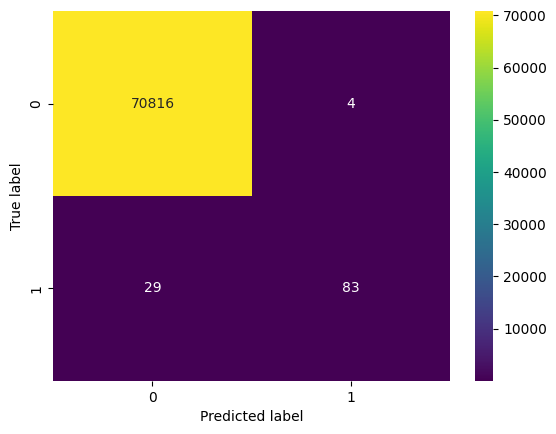

In [44]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='viridis', annot = True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [45]:
#Get Key RF Metrics
rf1_metrics = get_metrics(y_test,y_pred,y_prob_df_rf1[1])

Classification Report
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     70820
           1     0.9540    0.7411    0.8342       112

    accuracy                         0.9995     70932
   macro avg     0.9768    0.8705    0.9170     70932
weighted avg     0.9995    0.9995    0.9995     70932

AUC: 0.94


### 4.2) Second Approach: Using Borderline Oversampling

In [46]:
# Borderline Smote adds values to the border of two classes
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',  
    random_state=21,  
    k_neighbors=5, 
    m_neighbors=10, 
    kind='borderline-1',
    n_jobs=-1
)

X_res, y_res = sm_b1.fit_resample(X_train_sc, y_train)

#### Logistic Regression Model

In [47]:
#Instantiate the Model
log_model = LogisticRegression(max_iter =200, random_state=21)

In [48]:
#Train the Model
log_model.fit(X_res, y_res)

LogisticRegression(max_iter=200, random_state=21)

In [49]:
#Predict on Test Set
y_pred = log_model.predict(X_test_sc)

In [50]:
#Predict on Test Set
y_pred = log_model.predict(X_test_sc)

In [51]:
#Get Predicted Probabilities
y_prob = log_model.predict_proba(X_test_sc)

In [52]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(70932, 2)

In [53]:
#Create a DataFrame
y_prob_df_logreg2 = pd.DataFrame(y_prob, index=y_test.index)

y_prob_df_logreg2.head(3)

,0,1
104697,0.999945,5.490163e-05
134356,1.000000,2.052396e-10
42637,1.000000,9.273252e-08


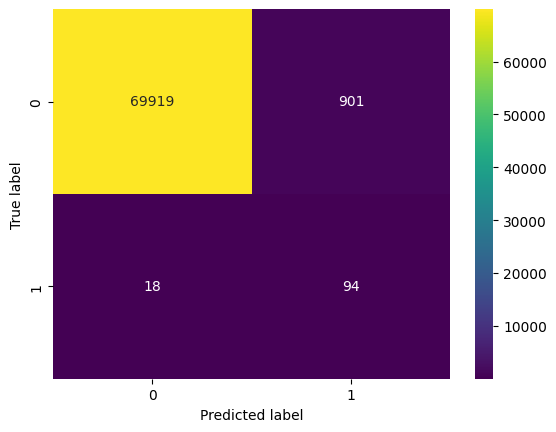

In [54]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='viridis', annot = True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [55]:
#Get Key Logistic Regression Metrics
logreg2_metrics = get_metrics(y_test,y_pred,y_prob_df_logreg2[1])

Classification Report
              precision    recall  f1-score   support

           0     0.9997    0.9873    0.9935     70820
           1     0.0945    0.8393    0.1698       112

    accuracy                         0.9870     70932
   macro avg     0.5471    0.9133    0.5816     70932
weighted avg     0.9983    0.9870    0.9922     70932

AUC: 0.96


#### Support Vector Classifier

In [56]:
#Instantiate the Model
svc_model = SVC(probability = True, random_state=21)

In [57]:
#Train the Model
svc_model.fit(X_res,y_res)

SVC(probability=True, random_state=21)

In [58]:
#Predict on Test Set
y_pred = svc_model.predict(X_test_sc)

In [59]:
#Get Predicted Probabilities
y_prob = svc_model.predict_proba(X_test_sc)

In [60]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(70932, 2)

In [61]:
#Create a DataFrame
y_prob_df_svc2 = pd.DataFrame(y_prob, index=y_test.index)

y_prob_df_svc2.head(3)

,0,1
104697,0.999999,6.757254e-07
134356,1.000000,1.000000e-07
42637,0.999999,1.109118e-06


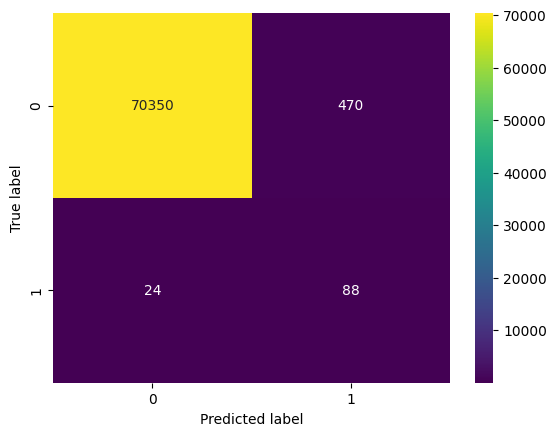

In [62]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='viridis', annot = True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [63]:
#Get Key SVC Metrics
svc2_metrics = get_metrics(y_test,y_pred,y_prob_df_svc2[1])

Classification Report
              precision    recall  f1-score   support

           0     0.9997    0.9934    0.9965     70820
           1     0.1577    0.7857    0.2627       112

    accuracy                         0.9930     70932
   macro avg     0.5787    0.8895    0.6296     70932
weighted avg     0.9983    0.9930    0.9953     70932

AUC: 0.93


#### Random Forest Classifier

In [64]:
#Instantiate the Model
rf_model = RandomForestClassifier(random_state=21)

In [65]:
#Train the Model
rf_model.fit(X_res,y_res)

RandomForestClassifier(random_state=21)

In [66]:
#Predict on Test Set
y_pred = rf_model.predict(X_test_sc)

In [67]:
#Get Predicted Probabilities
y_prob = rf_model.predict_proba(X_test_sc)

In [68]:
#Check the shape, there should be two columns, one for each class
y_prob.shape

(70932, 2)

In [69]:
#Create a DataFrame
y_prob_df_rf2 = pd.DataFrame(y_prob, index=y_test.index)

y_prob_df_rf2.head(3)

,0,1
104697,1.0,0.0
134356,1.0,0.0
42637,1.0,0.0


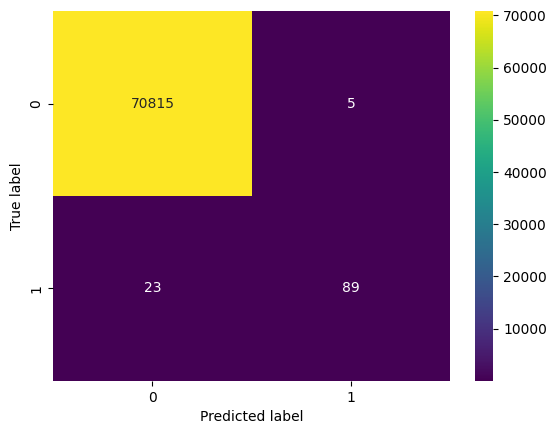

In [70]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='viridis', annot = True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [71]:
#Get Key RF Metrics
rf2_metrics = get_metrics(y_test,y_pred,y_prob_df_rf2[1])

Classification Report
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     70820
           1     0.9468    0.7946    0.8641       112

    accuracy                         0.9996     70932
   macro avg     0.9732    0.8973    0.9319     70932
weighted avg     0.9996    0.9996    0.9996     70932

AUC: 0.94


### Random Forest with both approaches combined

In [72]:
#Instantiate the Model
rf_model2 = RandomForestClassifier(class_weight= {0: 1, 1: 10}, random_state=21)

In [73]:
#Train the Model
rf_model2.fit(X_res,y_res)

RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=21)

In [74]:
#Predict on Test Set
y_pred = rf_model2.predict(X_test_sc)

In [75]:
#Get predicted probabilities
y_prob = rf_model2.predict_proba(X_test_sc)

In [76]:
#Create a DataFrame
y_prob_df_rf3 = pd.DataFrame(y_prob, index=y_test.index)

y_prob_df_rf3.head(3)

,0,1
104697,1.0,0.0
134356,1.0,0.0
42637,1.0,0.0


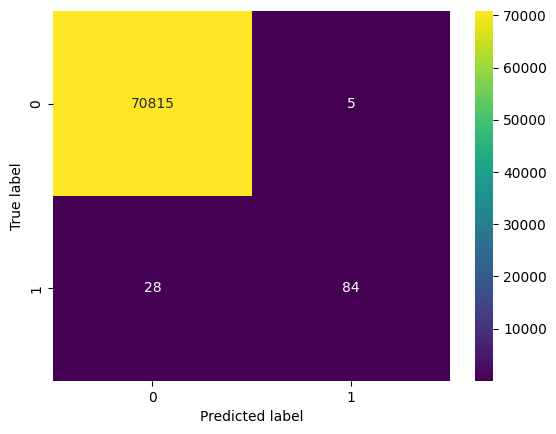

In [77]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), cmap='viridis', annot = True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [78]:
#Get Key RF Metrics
rf3_metrics = get_metrics(y_test,y_pred,y_prob_df_rf3[1])

Classification Report
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     70820
           1     0.9438    0.7500    0.8358       112

    accuracy                         0.9995     70932
   macro avg     0.9717    0.8750    0.9178     70932
weighted avg     0.9995    0.9995    0.9995     70932

AUC: 0.94


---

## 5) Summary of Key Metrics

In [79]:
#Create Dataframe for Performance Metrics of ALl Models
metric_labels = ("Precision","Recall", "F1 Score","AUC")
class_models = ("Approach 1: Logistic Regression","Approach 1: Support Vector Machines","Approach 1: Random Forest", "Approach 2: Logistic Regression","Approach 2: Support Vector Machines","Approach 2: Random Forest","Combined Approach: Random Forest")
metrics = (logreg1_metrics,svc1_metrics,rf1_metrics,logreg2_metrics,svc2_metrics,rf2_metrics,rf3_metrics)

df_modelperf = pd.DataFrame(index = metric_labels)

In [80]:
m = 0
for i in class_models:
    df_modelperf[i] = metrics[m]
    m += 1
    if m > len(metrics) - 1:
        break

In [81]:
df_modelperf

,Approach 1: Logistic Regression,Approach 1: Support Vector Machines,Approach 1: Random Forest,Approach 2: Logistic Regression,Approach 2: Support Vector Machines,Approach 2: Random Forest,Combined Approach: Random Forest
Precision,0.870671,0.968882,0.976807,0.547107,0.578683,0.973242,0.971712
Recall,0.897103,0.839250,0.870507,0.913282,0.889539,0.897286,0.874965
F1 Score,0.883430,0.893638,0.916969,0.581650,0.629594,0.931940,0.917794
AUC,0.976779,0.937813,0.935677,0.959508,0.929307,0.943735,0.943828


In [82]:
header=[['Approach 1','Approach 1','Approach 1','Approach 2','Approach 2','Approach 2','Combined Approach'],
        ['Logistic Regression','Support Vector Machines','Random Forest','Logistic Regression','Support Vector Machines','Random Forest','Random Forest']]

df_modelperf.columns = header

In [83]:
df_modelperf

Approach 1                                        \
          Logistic Regression Support Vector Machines Random Forest   
Precision            0.870671                0.968882      0.976807   
Recall               0.897103                0.839250      0.870507   
F1 Score             0.883430                0.893638      0.916969   
AUC                  0.976779                0.937813      0.935677   

                   Approach 2                                        \
          Logistic Regression Support Vector Machines Random Forest   
Precision            0.547107                0.578683      0.973242   
Recall               0.913282                0.889539      0.897286   
F1 Score             0.581650                0.629594      0.931940   
AUC                  0.959508                0.929307      0.943735   

          Combined Approach  
              Random Forest  
Precision          0.971712  
Recall             0.874965  
F1 Score           0.917794  
AUC                0.943828

In [84]:
df_modelperf.T

Precision    Recall  F1 Score  \
Approach 1        Logistic Regression       0.870671  0.897103  0.883430   
                  Support Vector Machines   0.968882  0.839250  0.893638   
                  Random Forest             0.976807  0.870507  0.916969   
Approach 2        Logistic Regression       0.547107  0.913282  0.581650   
                  Support Vector Machines   0.578683  0.889539  0.629594   
                  Random Forest             0.973242  0.897286  0.931940   
Combined Approach Random Forest             0.971712  0.874965  0.917794   

                                                AUC  
Approach 1        Logistic Regression      0.976779  
                  Support Vector Machines  0.937813  
                  Random Forest            0.935677  
Approach 2        Logistic Regression      0.959508  
                  Support Vector Machines  0.929307  
                  Random Forest            0.943735  
Combined Approach Random Forest            0.943828